In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from rotation_rate_utils import plot_layerwise_angle_deviation_curves

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
with open('../results.p','rb') as f:
    results = pickle.load(f)

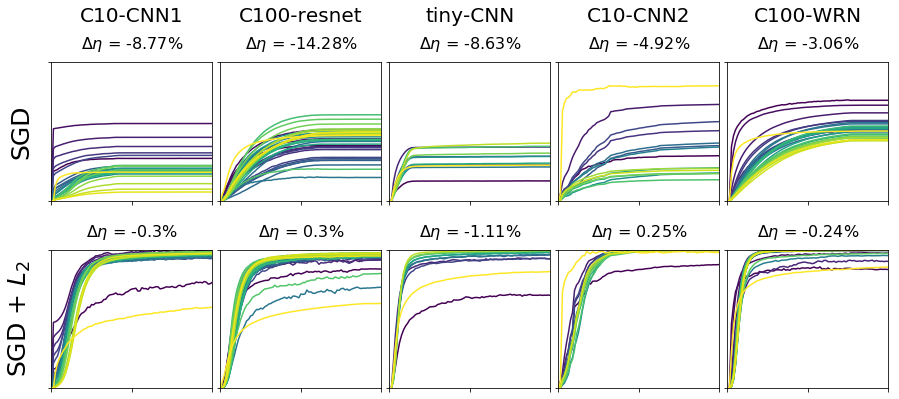

In [9]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
f, axes = plt.subplots(2,len(tasks), figsize = (3*len(tasks),6))
for i,task in enumerate(tasks):
    plot_layerwise_angle_deviation_curves(results[task]['SGD']['ladc'], ax = axes[0,i])
    plot_layerwise_angle_deviation_curves(results[task]['SGD_weight_decay']['ladc'], ax = axes[1,i])
    
    ref_performance = results[task]['SGD_layca'][0.][3**-3]['test_performance'][1]
    axes[0,i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD']['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    axes[1,i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD_weight_decay']['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[0,i].set_xlabel('')
    axes[0,i].set_ylabel('')
    axes[0,i].set_xticklabels('')
    axes[0,i].set_yticklabels('')
    axes[0,i].set_xlim([0,80])
    axes[0,i].set_xticks([0,40,80]) 
    axes[1,i].set_xlim([0,80])
    axes[1,i].set_xticks([0,40,80])
    
    axes[1,i].set_ylabel('')
    axes[1,i].set_yticklabels('')
    axes[1,i].set_xlabel('')
    axes[1,i].set_xticklabels('')
        
axes[1,0].set_xticks([0,40,80]) 

pad = 3
axes[0,0].annotate('SGD', xy=(0, 0.5), xytext=(-axes[0,0].yaxis.labelpad - pad, 0),
            xycoords=axes[0,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)
pad = 3
axes[1,0].annotate('SGD + $L_2$', xy=(0, 0.5), xytext=(-axes[1,0].yaxis.labelpad - pad, 0),
            xycoords=axes[1,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)

for j in range(5):
    pad = 40
    size = 20
    axes[0,j].annotate(tasks[j], xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
    
    
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/SGD_analysis_curves.png',format='png', dpi=200, bbox_inches="tight")

In [4]:
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
for wd in ['','_weight_decay']:
    performances = []
    for task in tasks:
        performances.append(round(results[task]['SGD'+wd]['history']['history']['acc'][-1],3))
    print(performances)

[1.0, 1.0, 1.0, 0.91, 1.0]
[1.0, 1.0, 0.898, 0.995, 1.0]
